# Exercise 3
 Import the libraries that we'll use

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.linalg import expm
#import warnings
#warnings.simplefilter("ignore")
np.random.seed(100)

To read the network from a file, we use the command read_edgelist.

In [2]:
G= nx.read_edgelist("../data/lesmis.txt", nodetype=int, data=(('weight',float),))

We transfor the network into the undirected version.

In [3]:
G = G.to_undirected()

Here we consider only the largest component.

In [4]:
Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
G=Gcc[0]

Sometimes the node labels are not in the sequential order or strings are used. To facilitate our implementation, let us convert the labels to integers starting with the index zero, because Python uses 0-based indexing.

In [5]:
G = nx.convert_node_labels_to_integers(G, first_label=0)

Let us verify the number of nodes and edges of the network.

In [6]:
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

Number of nodes: 77
Number of edges: 254


Plot the graph

/home/flaviokc/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


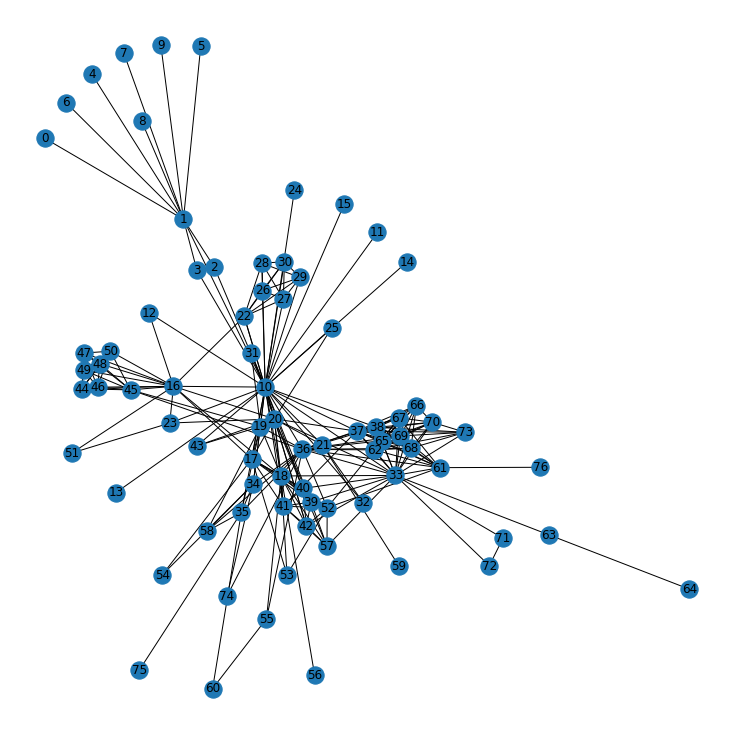

<Figure size 432x288 with 0 Axes>

In [7]:
plt.figure(figsize=(10,10))
pos=nx.spring_layout(G)
nx.draw(G, with_labels = True, pos = pos)
plt.show(block=False)
plt.clf()

### Random Walk
 Random Walk Accessibility Function

In [8]:
def random_walk_accessibility(G):
    N = len(G.nodes())
    vk = dict(G.degree())
    vk = list(vk.values())
    A = nx.adjacency_matrix(G)
    P = np.zeros((N,N), dtype = 'float')
    for i in np.arange(0, N):
        for j in np.arange(i, N):
            P[i,j] = A[i,j]/vk[i]
            P[j,i] = P[i,j]
    P2 = expm(P)/np.exp(1)
    vacc = np.zeros(N, dtype = float)
    for i in np.arange(0, N):
        acc = 0
        for j in np.arange(0,N):
            if(P2[i,j] > 0):
                acc = acc + P2[i,j]*math.log(P2[i,j])
        acc = np.exp(-acc)
        vacc[i] = acc
    return vacc

Calculate the number of visits of a random walk

In [9]:
random_walk = random_walk_accessibility(G)

### Degree
 Get the degree of all the nodes in a list

In [10]:
degrees = dict(G.degree())
degrees = list(degrees.values())  # we get only the degree values
degrees = np.array(degrees)

To see the correlation of the random walk and the degree of the nodes, we plot it

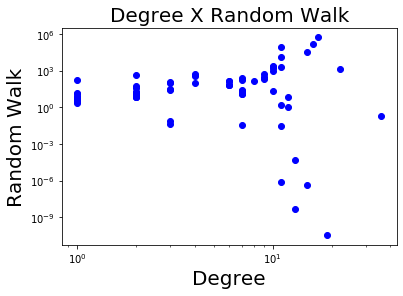

<Figure size 432x288 with 0 Axes>

In [11]:
fig = plt.subplot(1,1,1)
fig.set_xscale('log')
fig.set_yscale('log')
plt.plot(degrees,random_walk,'bo')
plt.xlabel("Degree", fontsize=20)
plt.ylabel("Random Walk", fontsize=20)
plt.title("Degree X Random Walk", fontsize=20)
plt.show(block=False)
plt.clf()

As we can see, the correlation is really small.

### Pearson correlation coefficient
 We can also calculate the Pearson correlation coefficient

In [12]:
print('Pearson correlation coefficient:', np.corrcoef(degrees, random_walk)[0,1])

Pearson correlation coefficient: 0.26593474681464313


*According to the Cauchy–Schwarz inequality it has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.* - [Wikipedia](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

Because the Pearson correlation coefficient is close to zero, we can state that there is no linear correlation between the random walk result and the degrees of the nodes in this graph.